In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

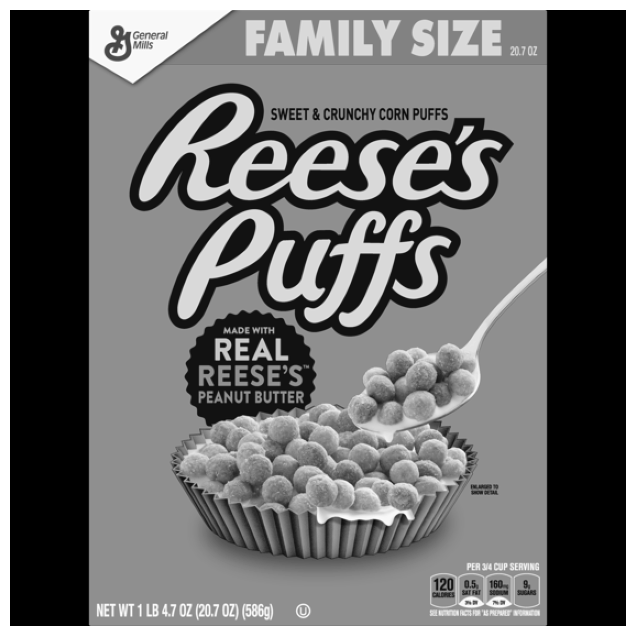

In [3]:
reeses_puff_img_gray = cv2.imread('Data/reeses_puffs.png', 0)

display_img(reeses_puff_img_gray)

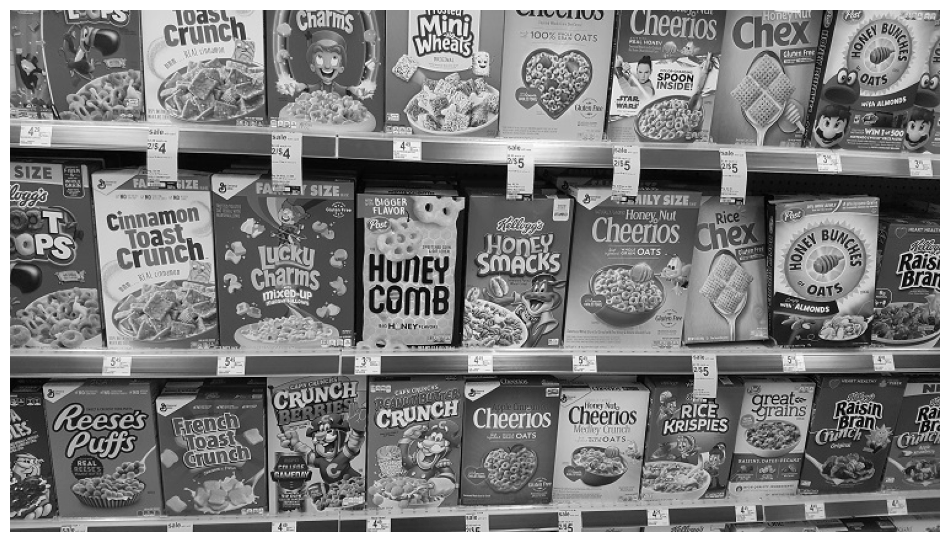

In [4]:
cereals_img_gray = cv2.imread('Data/many_cereals.jpg', 0)

display_img(cereals_img_gray)

## FEATURE MATCHING:

### BRUTE FORCE DETECTION WITH ORB DESCRIPTORS:

In [5]:
#extracts defining key featurees from an input image.
#using corner, edge, contour detection

#but template matching - exact same object in image

#creating a detector
orb_detector_fetmpg = cv2.ORB_create()


In [6]:
#keypoints and descriptors for this detector object
kp_rp, desc_rp = orb_detector_fetmpg.detectAndCompute(reeses_puff_img_gray, None)
kp_cr, desc_cr = orb_detector_fetmpg.detectAndCompute(cereals_img_gray, None)

In [7]:
kp_rp

(< cv2.KeyPoint 0x11a2f2b80>,
 < cv2.KeyPoint 0x11a2f1c50>,
 < cv2.KeyPoint 0x11a405cb0>,
 < cv2.KeyPoint 0x11a406a90>,
 < cv2.KeyPoint 0x11a347e70>,
 < cv2.KeyPoint 0x11a347fc0>,
 < cv2.KeyPoint 0x11a345d70>,
 < cv2.KeyPoint 0x11a347bd0>,
 < cv2.KeyPoint 0x11a347d50>,
 < cv2.KeyPoint 0x11a345ec0>,
 < cv2.KeyPoint 0x11a347de0>,
 < cv2.KeyPoint 0x11a3457d0>,
 < cv2.KeyPoint 0x11a347db0>,
 < cv2.KeyPoint 0x11a43f030>,
 < cv2.KeyPoint 0x11a43ef70>,
 < cv2.KeyPoint 0x11a43eeb0>,
 < cv2.KeyPoint 0x11a43f930>,
 < cv2.KeyPoint 0x11a43ff30>,
 < cv2.KeyPoint 0x11a43f480>,
 < cv2.KeyPoint 0x11a43e820>,
 < cv2.KeyPoint 0x11a43f7e0>,
 < cv2.KeyPoint 0x11a43fb40>,
 < cv2.KeyPoint 0x11a43ed90>,
 < cv2.KeyPoint 0x11a43fd20>,
 < cv2.KeyPoint 0x11a43fcf0>,
 < cv2.KeyPoint 0x11a43fcc0>,
 < cv2.KeyPoint 0x11a43fc90>,
 < cv2.KeyPoint 0x11a43fbd0>,
 < cv2.KeyPoint 0x11a43e7f0>,
 < cv2.KeyPoint 0x11a43fc60>,
 < cv2.KeyPoint 0x11a43fe40>,
 < cv2.KeyPoint 0x11a43e880>,
 < cv2.KeyPoint 0x11a43f900>,
 < cv2.Key

In [8]:
kp_cr

(< cv2.KeyPoint 0x11a46d650>,
 < cv2.KeyPoint 0x11a46d680>,
 < cv2.KeyPoint 0x11a46d6b0>,
 < cv2.KeyPoint 0x11a46d6e0>,
 < cv2.KeyPoint 0x11a46d710>,
 < cv2.KeyPoint 0x11a46d740>,
 < cv2.KeyPoint 0x11a46d770>,
 < cv2.KeyPoint 0x11a46d7a0>,
 < cv2.KeyPoint 0x11a46d7d0>,
 < cv2.KeyPoint 0x11a46d800>,
 < cv2.KeyPoint 0x11a46d830>,
 < cv2.KeyPoint 0x11a46d860>,
 < cv2.KeyPoint 0x11a46d890>,
 < cv2.KeyPoint 0x11a46d8c0>,
 < cv2.KeyPoint 0x11a46d8f0>,
 < cv2.KeyPoint 0x11a46d920>,
 < cv2.KeyPoint 0x11a46d950>,
 < cv2.KeyPoint 0x11a46d980>,
 < cv2.KeyPoint 0x11a46d9b0>,
 < cv2.KeyPoint 0x11a46d9e0>,
 < cv2.KeyPoint 0x11a46da10>,
 < cv2.KeyPoint 0x11a46da40>,
 < cv2.KeyPoint 0x11a46da70>,
 < cv2.KeyPoint 0x11a46daa0>,
 < cv2.KeyPoint 0x11a46dad0>,
 < cv2.KeyPoint 0x11a46db00>,
 < cv2.KeyPoint 0x11a46db30>,
 < cv2.KeyPoint 0x11a46db60>,
 < cv2.KeyPoint 0x11a46db90>,
 < cv2.KeyPoint 0x11a46dbc0>,
 < cv2.KeyPoint 0x11a46dbf0>,
 < cv2.KeyPoint 0x11a46dc20>,
 < cv2.KeyPoint 0x11a46dc50>,
 < cv2.Key

In [9]:
desc_rp

array([[  9, 219, 135, ..., 134,  33, 121],
       [  0, 140,  29, ...,   8, 148, 170],
       [ 17,  39, 107, ...,  10,  83, 224],
       ...,
       [ 40, 153, 252, ..., 235,  72, 154],
       [ 40, 150, 112, ..., 142, 198, 210],
       [ 90, 162,  53, ...,   6,  45,  72]], dtype=uint8)

In [10]:
desc_cr

array([[122, 178, 149, ...,  40,  86, 163],
       [128,  20, 180, ...,  88, 209,  46],
       [184,  65, 114, ..., 174, 124,   2],
       ...,
       [ 89, 144, 237, ..., 128,  68, 120],
       [ 45,  37,  80, ..., 139,  90, 129],
       [243,   1,  39, ...,   4, 166, 118]], dtype=uint8)

In [11]:
desc_rp.shape

(500, 32)

In [12]:
desc_cr.shape

(500, 32)

In [13]:
type(kp_cr)

tuple

In [14]:
#now using brute force with orb detectors

#now creating a matching object using bf 

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


In [15]:
bf

< cv2.BFMatcher 0x11a3b3ad0>

In [16]:
#now using bf with orb detectors object to find the matches b/w two images

matches = bf.match(desc_rp, desc_cr)

In [17]:
matches

(< cv2.DMatch 0x11a32f2f0>,
 < cv2.DMatch 0x11a3b3c90>,
 < cv2.DMatch 0x11a3b38d0>,
 < cv2.DMatch 0x11a3b3b10>,
 < cv2.DMatch 0x11a3b3a90>,
 < cv2.DMatch 0x11a3b3bb0>,
 < cv2.DMatch 0x11a3b2130>,
 < cv2.DMatch 0x11a3b3bf0>,
 < cv2.DMatch 0x11a3b2110>,
 < cv2.DMatch 0x11a3b3a50>,
 < cv2.DMatch 0x11a3b3890>,
 < cv2.DMatch 0x11a3b3a10>,
 < cv2.DMatch 0x11a3b3830>,
 < cv2.DMatch 0x11a3b3b70>,
 < cv2.DMatch 0x11a3b3c70>,
 < cv2.DMatch 0x11a3b3c50>,
 < cv2.DMatch 0x11a3b3870>,
 < cv2.DMatch 0x11a3b38b0>,
 < cv2.DMatch 0x11a3b3cd0>,
 < cv2.DMatch 0x11a3b3cf0>,
 < cv2.DMatch 0x11a3b3d10>,
 < cv2.DMatch 0x11a3b3d30>,
 < cv2.DMatch 0x11a3b3d50>,
 < cv2.DMatch 0x11a3b3d70>,
 < cv2.DMatch 0x11a3b3d90>,
 < cv2.DMatch 0x11a3b3db0>,
 < cv2.DMatch 0x11a3b3dd0>,
 < cv2.DMatch 0x11a3b3df0>,
 < cv2.DMatch 0x11a3b3e10>,
 < cv2.DMatch 0x11a3b3e30>,
 < cv2.DMatch 0x11a3b3e50>,
 < cv2.DMatch 0x11a3b3e70>,
 < cv2.DMatch 0x11a3b3e90>,
 < cv2.DMatch 0x11a3b3eb0>,
 < cv2.DMatch 0x11a3b3ed0>,
 < cv2.DMatch 0x11a3

In [18]:
len(matches)

138

In [19]:
#sorting these matches in order of distance - to get top matches (similar kind)
#ecah of match has a distance attribute

matches_smlr = sorted(matches, key=lambda x:x.distance)

In [20]:
matches_smlr

[< cv2.DMatch 0x11a47c1b0>,
 < cv2.DMatch 0x11a3b3f30>,
 < cv2.DMatch 0x11a3b3890>,
 < cv2.DMatch 0x11a47c1f0>,
 < cv2.DMatch 0x11a47c490>,
 < cv2.DMatch 0x11a47c6d0>,
 < cv2.DMatch 0x11a47c5b0>,
 < cv2.DMatch 0x11a47c0d0>,
 < cv2.DMatch 0x11a47c190>,
 < cv2.DMatch 0x11a3b3a90>,
 < cv2.DMatch 0x11a47c3d0>,
 < cv2.DMatch 0x11a47c510>,
 < cv2.DMatch 0x11a3b3a10>,
 < cv2.DMatch 0x11a3b3b70>,
 < cv2.DMatch 0x11a3b3d50>,
 < cv2.DMatch 0x11a3b3fb0>,
 < cv2.DMatch 0x11a47c330>,
 < cv2.DMatch 0x11a3b3c50>,
 < cv2.DMatch 0x11a3b3d70>,
 < cv2.DMatch 0x11a47c130>,
 < cv2.DMatch 0x11a3b3bb0>,
 < cv2.DMatch 0x11a47c5d0>,
 < cv2.DMatch 0x11a47c570>,
 < cv2.DMatch 0x11a47c770>,
 < cv2.DMatch 0x11a47c850>,
 < cv2.DMatch 0x11a32f2f0>,
 < cv2.DMatch 0x11a47c070>,
 < cv2.DMatch 0x11a47c0b0>,
 < cv2.DMatch 0x11a47c2b0>,
 < cv2.DMatch 0x11a3b3830>,
 < cv2.DMatch 0x11a3b3e90>,
 < cv2.DMatch 0x11a47c370>,
 < cv2.DMatch 0x11a47c430>,
 < cv2.DMatch 0x11a3b3cf0>,
 < cv2.DMatch 0x11a47c7d0>,
 < cv2.DMatch 0x11a4

In [21]:
len(matches_smlr)

138

In [22]:
#drawing these all matches using both images and top 30 matches

reeses_matches = cv2.drawMatches(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_cr, matches[:30], None, flags=2)



In [23]:
reeses_matches

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [129, 129, 129],
        [116, 116, 116],
        [ 48,  48,  48]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [112, 112, 112],
        [116, 116, 116],
        [ 47,  47,  47]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 70,  70,  70]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [24]:
reeses_matches.shape

(560, 1317, 3)

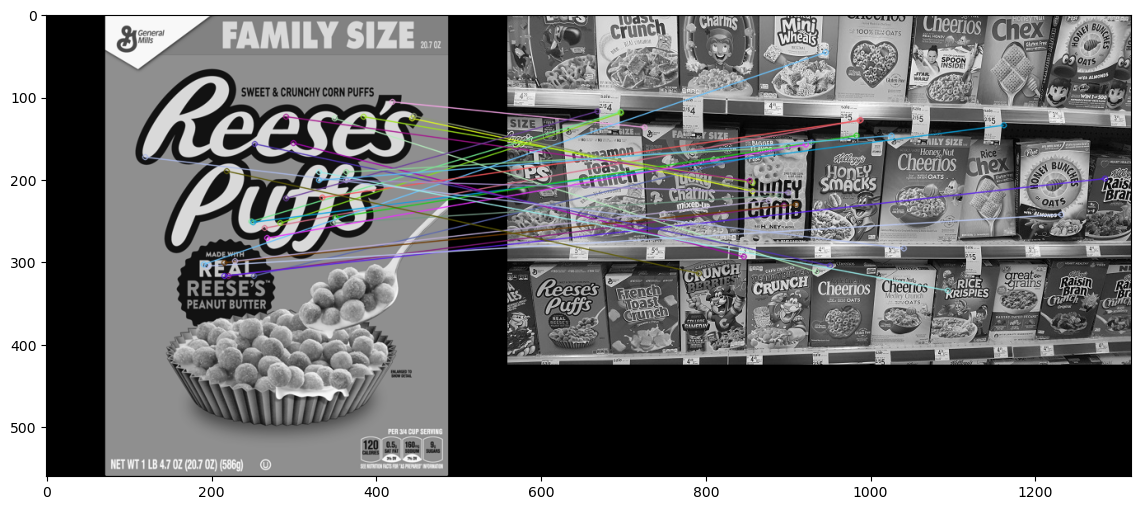

In [25]:
fig = plt.figure(figsize=(14,9))
plt.imshow(reeses_matches)
plt.show()
plt.close()

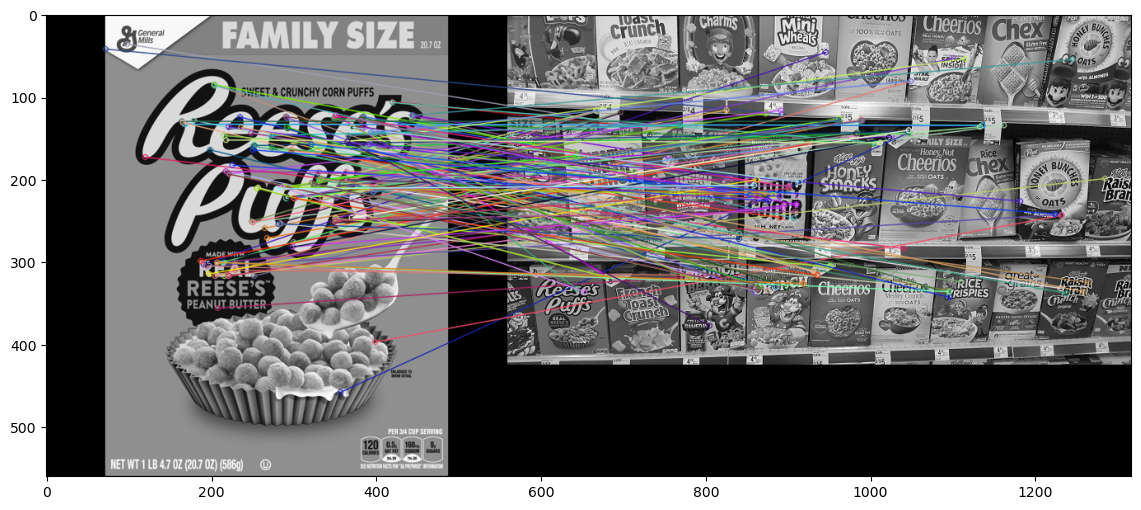

In [26]:
#can see clearly the top match doesn't have the matching


reeses_matches_all = cv2.drawMatches(reeses_puff_img_gray, kp_rp, cereals_img_gray, kp_cr, matches, None, flags=2)

fig = plt.figure(figsize=(14,9))
plt.imshow(reeses_matches_all)
plt.show()
plt.close()

In [27]:
# match detected the many object

#this is bcs of confusion that family size is creating it is thinking of other object